# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
main_dir: [ 0.49926819 -0.86644751] theta: -29.95159531242507


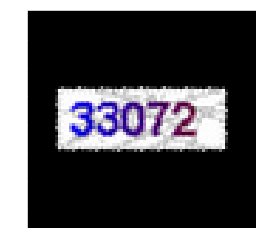

In [129]:
from hack_pca import hack_pca

# Hack different images yourself
img = hack_pca('1.gif')
plt.imshow(img)

## Apply PCA on face image

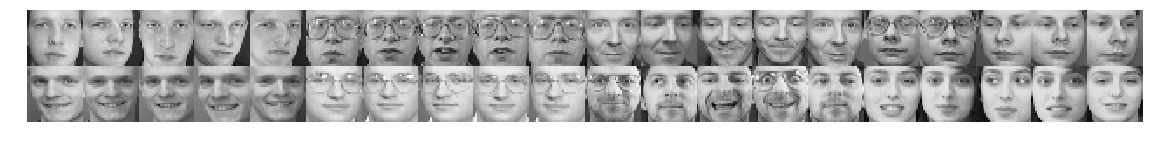

In [2]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer
# end answer
from show_face import show_face
show_face(fea_Train)

e:\研一\ML_ZJU\hw_4\ml2019fall_hw4\pca\show_face.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  = fea[i * numPerLine + j, :].reshape((faceH, faceW)).transpose()


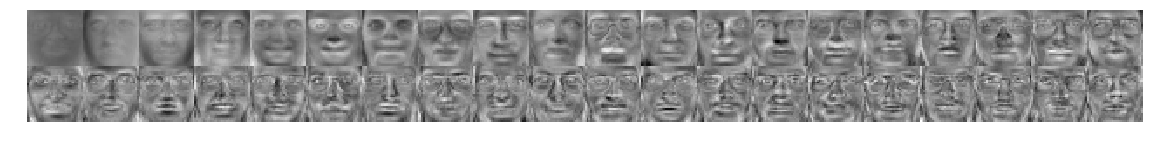

In [3]:
# 2. Run PCA
# begin answer
from pca import PCA
v,e = PCA(fea_Train)
# end answer
# 3. Visualize eigenface
# begin answer
show_face(v.T)
# end answer

In [4]:
# 4. Project data on to low dimensional space
# begin answer
from knn import knn

for dim in (8, 16, 32, 64, 128):
    W = v[:, :dim]
    faces_train = fea_Train @ W
    faces_test = fea_Test @ W
    pred = knn(faces_test, faces_train, gnd_Train, k=1)
    err_rate = np.sum(pred != gnd_Test) / gnd_Test.shape[0]
    print('knn err rate using dim {}:'.format(dim), err_rate)
# end answer
# 5. Run KNN in low dimensional space
# begin answer
# end answer

knn err rate using dim 8: 0.245
knn err rate using dim 16: 0.2
knn err rate using dim 32: 0.18
knn err rate using dim 64: 0.15
knn err rate using dim 128: 0.15


recover faces using dim 8:
recover faces using dim 16:
e:\研一\ML_ZJU\hw_4\ml2019fall_hw4\pca\show_face.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  = fea[i * numPerLine + j, :].reshape((faceH, faceW)).transpose()
recover faces using dim 32:
recover faces using dim 64:
recover faces using dim 128:


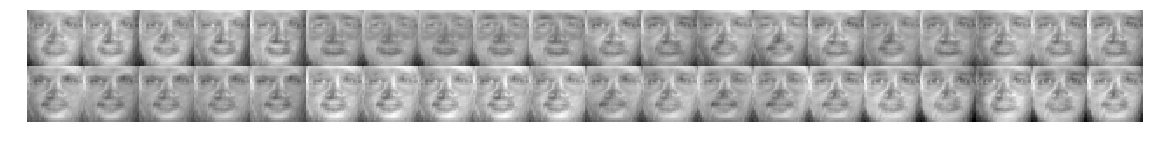

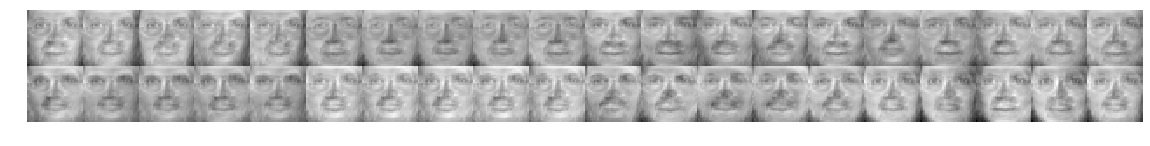

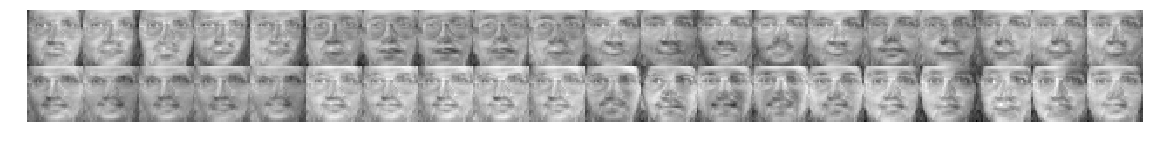

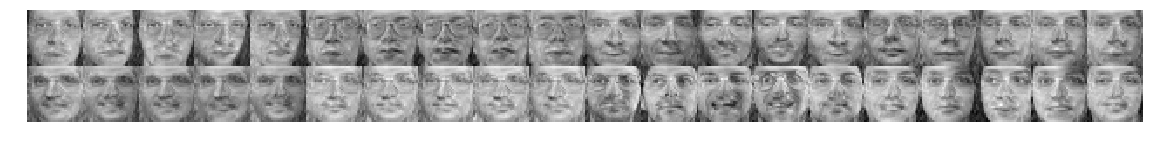

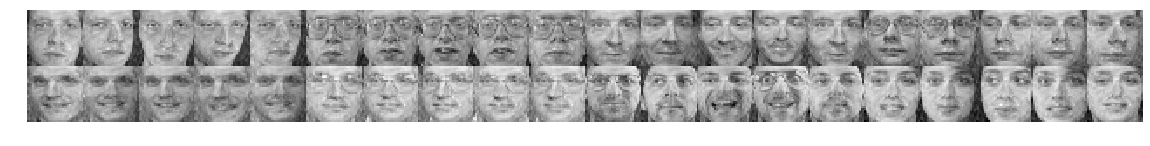

In [6]:
# 6. Recover face images form low dimensional space, visualize them
# begin answer
for dim in (8, 16, 32, 64, 128):
    print('recover faces using dim {}:'.format(dim))
    W = v[:, :dim]
    faces_train = fea_Train @ W
    recovers = faces_train @ W.T
    show_face(recovers)
# end answer  

## You are encouraged to apply LDA on this dataset!

In [97]:
from LDA import LDA

# Your code here
# begin answer
from knn import knn
vl, el = LDA(fea_Train, gnd_Train)
for dim in (8, 16, 32, 64， 128):
    W = vl[:, :dim]
    faces_train = fea_Train @ W
    faces_test = fea_Test @ W
    pred = knn(faces_test, faces_train, gnd_Train, k=1)
    err_rate = np.sum(pred != gnd_Test) / gnd_Test.shape[0]
    print('knn err rate using dim {}:'.format(dim), err_rate)
# end answer

knn err rate using dim 8: 0.13
knn err rate using dim 16: 0.065
knn err rate using dim 32: 0.04
knn err rate using dim 64: 0.035
